##  Saturn Store Data Analysis Project

In [113]:
import pandas as pd


# download the excel worksheet into jupyter folder 
df = pd.read_excel(r'C:\Users\Home\Desktop\sample_project_1\Copy of Asset_sales_data.xlsx')
# df
df

,date,products,sales
0,2024-12-11,grocery,19234
1,2024-12-12,clothes,87598
2,2024-07-11,grocery,15900
3,2024-06-12,clothes,12087
4,2024-09-12,grocery,56897
5,2024-06-12,shoes,20025
6,2024-12-11,grocery,15963
7,2024-12-12,clothes,21458
8,2024-11-12,medicines,55778
9,2024-06-12,shoes,56987


In [114]:
print(df.dtypes)

date        datetime64[ns]
products            object
sales                int64
dtype: object


In [115]:
#  Converting date to pandas datetime object.
df['month'] = pd.to_datetime(df['date']).dt.month
df.head()

,date,products,sales,month
0,2024-12-11,grocery,19234,12
1,2024-12-12,clothes,87598,12
2,2024-07-11,grocery,15900,7
3,2024-06-12,clothes,12087,6
4,2024-09-12,grocery,56897,9


In [116]:
df.dtypes

date        datetime64[ns]
products            object
sales                int64
month                int32
dtype: object

In [117]:
df

,date,products,sales,month
0,2024-12-11,grocery,19234,12
1,2024-12-12,clothes,87598,12
2,2024-07-11,grocery,15900,7
3,2024-06-12,clothes,12087,6
4,2024-09-12,grocery,56897,9
5,2024-06-12,shoes,20025,6
6,2024-12-11,grocery,15963,12
7,2024-12-12,clothes,21458,12
8,2024-11-12,medicines,55778,11
9,2024-06-12,shoes,56987,6


## use the group_by method to find month with highest sales

In [118]:
max_sales_month = df.groupby(df['month']).sum(numeric_only=True).idxmax()
max_sales_month

sales    12
dtype: int32

### Use groupby and idxmax to find colunm with max sales

In [119]:
saless_per_month = df.groupby(df['month']).sum(numeric_only=True)
saless_per_month

,sales
month,
2,66992
4,78945
6,127353
7,31836
9,112452
11,160542
12,309373


### Using .loc to filter DataFrame by Date

In [120]:
df2 = df.loc[(df['date'] >= '11-02-2024') & (df['date'] <= '20-12-2024')]
df2

,date,products,sales,month
0,2024-12-11,grocery,19234,12
1,2024-12-12,clothes,87598,12
6,2024-12-11,grocery,15963,12
7,2024-12-12,clothes,21458,12
8,2024-11-12,medicines,55778,11
12,2024-11-12,medicines,90012,11
15,2024-12-12,shoes,36987,12
16,2024-12-20,medicines,23025,12
19,2024-11-11,grocery,14752,11
20,2024-12-11,medicines,56987,12


In [121]:
df2['sales'].sum()

469915

### Display DataFrame with Matpltlib

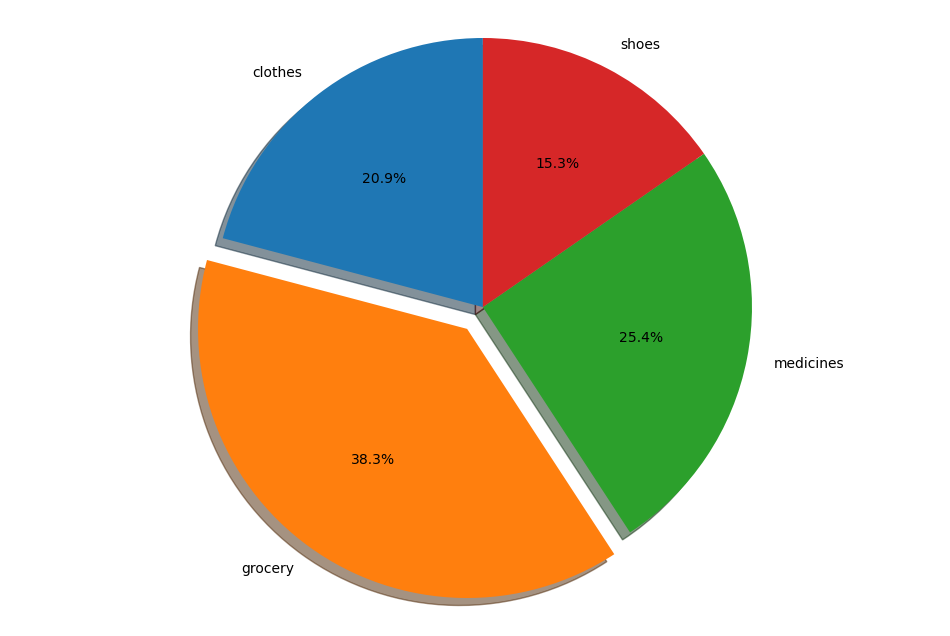

In [136]:
#import matplotlib.pyplot as plt

#prod_sales = df.groupby(['products'])['sales'].sum()

#explode = (0, 0.1, 0)


#plt.figure(figsize=(12, 8))
#plt.pie(x,
       # explode=explode,
       # labels=prod_sales.index,
        ##autopct ='%1.1f%%',
       # shadow=True)
#plt.title('Sales Pie Chart', fontsize=20)
#plt.show()

import matplotlib.pyplot as plt

prod_sales = df.groupby('products')['sales'].sum()

# Dynamically explode the product with the highest sales
explode = [0.1 if i == prod_sales.argmax() else 0 for i in range(len(prod_sales))]

plt.figure(figsize=(12, 8))
plt.pie(prod_sales,
        explode=explode,
        labels=prod_sales.index,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
plt.title=('Sales Pie Chart')
plt.axis('equal')  # Keeps the pie circular
plt.show()

### Pivot Table

In [ ]:
sales_per_product = df.pivot_table(values='sales',
                                   index='products',
                                   aggfunc='sum')

sales_per_product

### plot the Graph

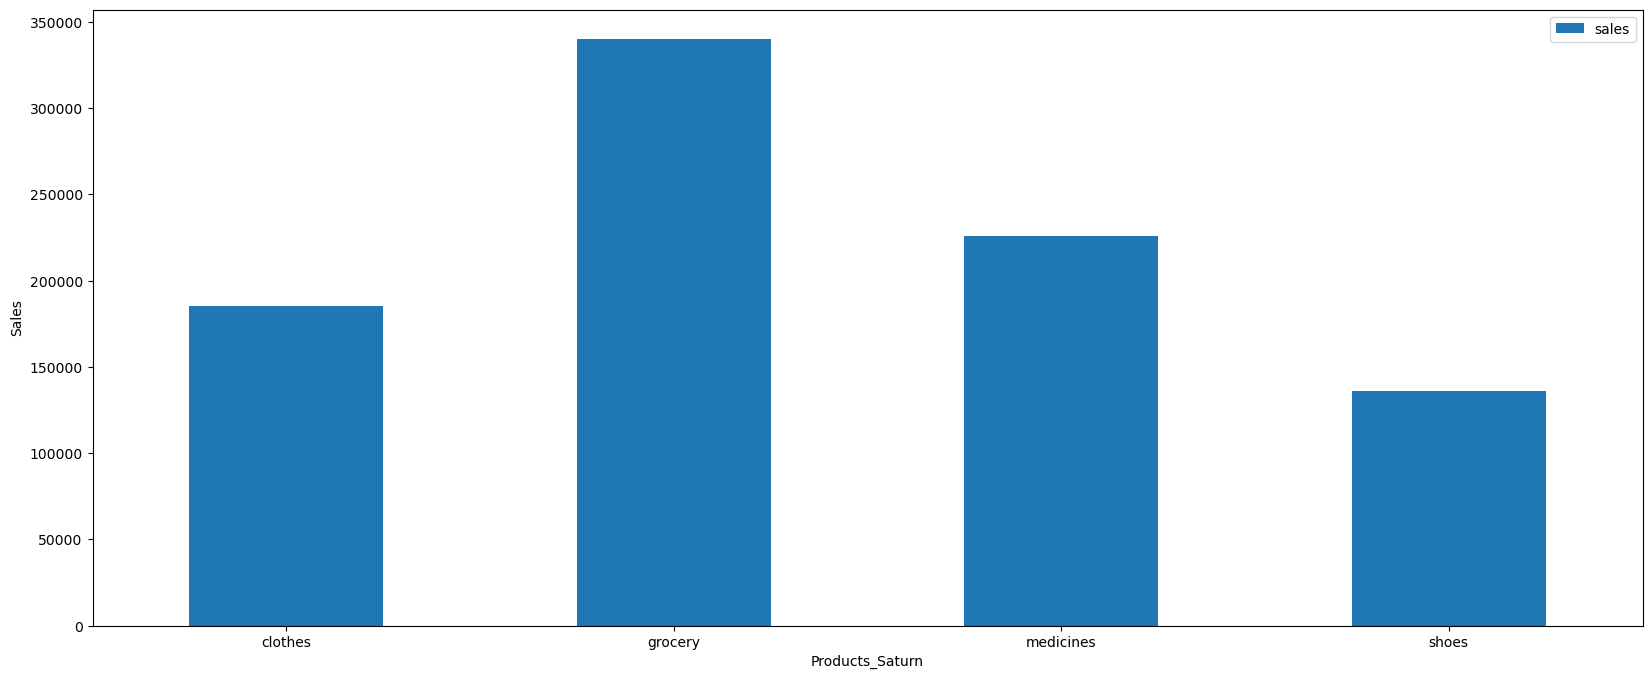

In [125]:
sales_per_product.plot(kind='bar', figsize=(20, 8))
plt.title =('Total Sales Per Month')
plt.xticks(rotation = 0)
plt.ylabel('Sales')
plt.xlabel('Products_Saturn')
plt.show()

In [ ]:
# 

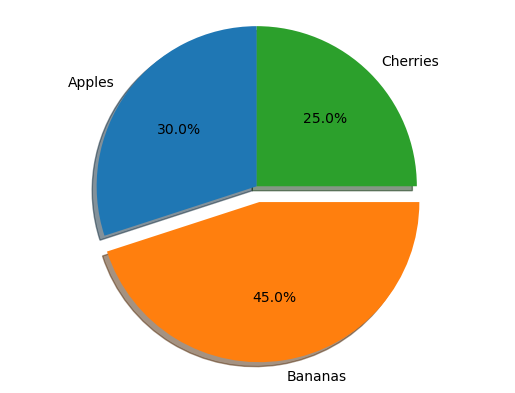

In [137]:
import matplotlib.pyplot as plt

labels = ['Apples', 'Bananas', 'Cherries']
sizes = [30, 45, 25]
explode = [0, 0.1, 0]  # Explode 'Bananas'

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title=('Fruit Sales Distribution')
plt.axis('equal')  # Keeps the pie circular
plt.show()
